# The SIR epidemic model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease;
I(t) is the number of infectious individuals;
R(t) are those individuals who have recovered from the disease and now have immunity to it.
The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick 

N is the total number of population
dS/dt =  -beta * S * I / N
dI/dt = beta * S * I/N - gamma * I
dR/dt = gamma * I



Case 1 :
Effective contact rate beta  is transmission rate * contact rate.
For an example, 10% transmission rate and 5 contacts a day is 0.1 * 5 = 0.50
Rate of recovery gamma is 1 / 16 no of days person is contagious which is 0.0625
R0 = beta / gamma
R0 = 0.50/ 0.0625
R0  = 8 which is very large.
When R0 is less than 1 then the curve flattens.


Let's do different plotting for Delhi . with different contract and recovery rate

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [3]:
#from google.colab import files
#uploaded = files.upload()

In [4]:
statedf = pd.read_excel('Covid_Data_11.Jul.2020C.xlsx')

In [5]:
statedf.head()

,Row Labels,Confirmed,Deceased,Recovered
0,14-Mar,7,1,1
1,15-Mar,0,0,1
2,16-Mar,0,0,0
3,17-Mar,1,0,0
4,18-Mar,2,0,0


In [6]:
statedf['Removed'] = statedf['Deceased'] + statedf['Recovered']
statedf.drop(['Deceased', 'Recovered'], axis=1, inplace=True)

In [7]:
Inf = np.array(statedf['Confirmed'])
len(Inf)

120

In [8]:
Rec = np.array(statedf['Removed'])
len(Rec)

120

Plotting Actual data

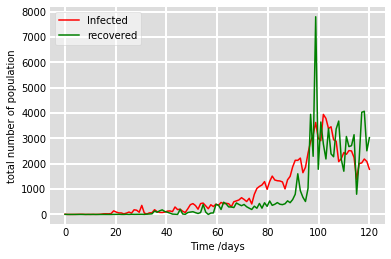

In [9]:
t = np.linspace(0, 120, 120)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Inf, 'r', label='Infected')
ax.plot(t, Rec, 'g', label='recovered')
#ax.plot(t, D, 'k', label='deceased')

ax.set_xlabel('Time /days')
ax.set_ylabel('total number of population')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Loading the coronavirus india data

In [10]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I
    # Change in I population over time
    dIdt = beta * S * I  - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt 

In [11]:
Infected =[]
Recovered = []
daily_totalInf = 0
daily_totalRec = 0

for valinf in Inf:
    daily_totalInf = valinf + daily_totalInf
    Infected.append(daily_totalInf)
for valrec in Rec:
    daily_totalRec = valrec + daily_totalRec 
    Recovered.append(daily_totalRec)

In [12]:
Recovered = np.array(Recovered)
Infected = np.array(Infected)

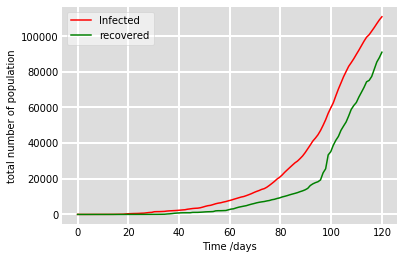

In [13]:
t = np.linspace(0, 120, 120)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Infected, 'r', label='Infected')
ax.plot(t, Recovered, 'g', label='recovered')
#ax.plot(t, D, 'k', label='deceased')

ax.set_xlabel('Time /days')
ax.set_ylabel('total number of population')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [14]:
len(Recovered)

120

In [15]:
len(Infected)

120

In [16]:
population_affected_in_city = 1
Infected_City = Infected
Recovered_City = Recovered
starting_day_for_0 = 40
Recovered_act_city = Recovered
Infected_act_city = Infected
Recovered_act_mse = Recovered[starting_day_for_0:]
Infected_act_mse = Infected[starting_day_for_0:]

In [17]:
#considering 5% of population. Total population for Chennai City is 10971108
total_pop = 19298507 * 0.05
Susceptible_City = total_pop - Infected_City - Recovered_City
len(Susceptible_City )

120

In [18]:
# Everyone not infected or recovered is susceptible
s= []
inf = []
r = []
dt = 1
beta = []
gamma =[]

count =0

for i in np.arange(0,119,1):
    beta.append((Susceptible_City[i]-Susceptible_City[i+1])/(Susceptible_City[i]*Infected_City[i]*dt))
    
for i in np.arange(0,119,1):
    gamma.append((Recovered_City[i+1]-Recovered_City[i])/(Infected_City[i]*dt))

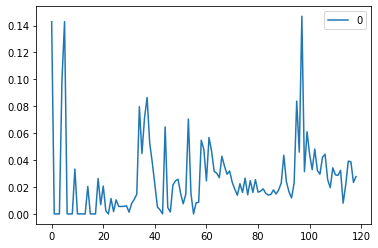

In [19]:
pd.DataFrame(gamma).plot()

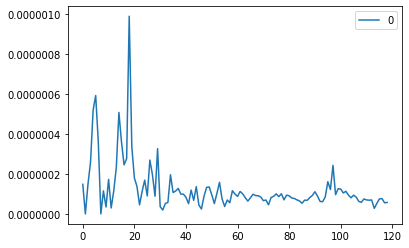

In [20]:
pd.DataFrame(beta).plot()

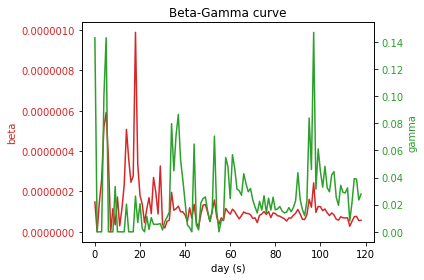

In [21]:
t = np.arange(0, 119, 1)
data1 = beta
data2 = gamma

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('day (s)')
ax1.set_ylabel('beta', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:green'
ax2.set_ylabel('gamma', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax1.set_title('Beta-Gamma curve')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [22]:
pd.DataFrame(beta[40:]).describe()

,0
count,7.900000e+01
mean,8.591474e-08
std,3.214184e-08
min,2.452610e-08
25%,6.793576e-08
50%,8.186957e-08
75%,9.890501e-08
max,2.428636e-07


In [23]:
pd.DataFrame(gamma[40:]).describe()

,0
count,79.000000
mean,0.028249
std,0.021186
min,0.000000
25%,0.015629
50%,0.024506
75%,0.033553
max,0.146886


In [24]:
beta_25 = pd.DataFrame(beta[40:]).describe().T['25%'][0]
beta_75 = pd.DataFrame(beta[40:]).describe().T['75%'][0]
gamma_25 = pd.DataFrame(gamma[40:]).describe().T['25%'][0]
gamma_75 = pd.DataFrame(gamma[40:]).describe().T['75%'][0]

In [25]:
dfpredicted = pd.DataFrame(columns = ['S','I','R','beta','gamma'])
total_days = 600
days = range(0, total_days)
sus = []
inf = []
rec = []

for k in np.linspace(beta_25, beta_75, 30):
    for z in np.linspace(gamma_25, gamma_75, 30):
        ret = odeint(deriv,
             [Susceptible_City[starting_day_for_0], Infected_City[starting_day_for_0], Recovered_City[starting_day_for_0]],
             days,
             args=(total_pop, k, z))

        dftemp = pd.DataFrame(ret,columns = ['S','I','R'])
        dftemp['beta'] = k
        dftemp['gamma'] = z
        dfpredicted = pd.concat([dfpredicted, dftemp])

In [26]:
from sklearn.metrics import mean_squared_error
mserec=[]
mseinf = [] 
betanew = []
gammanew = []
count_recs = len(Infected_act_mse)
for t in np.arange(0,dfpredicted.shape[0],total_days):
    Recovered_pred = np.array(dfpredicted.iloc[t:t+total_days]['R'][0:count_recs])
    Infected_pred = np.array(dfpredicted.iloc[t:t+total_days]['I'][0:count_recs])
    betanew.append(dfpredicted.iloc[t:t+total_days]['beta'][0:1].to_numpy()[0])
    gammanew.append(dfpredicted.iloc[t:t+total_days]['gamma'][0:1].to_numpy()[0])
    mserec.append(mean_squared_error(Recovered_act_mse, Recovered_pred))
    mseinf.append(mean_squared_error(Infected_act_mse, Infected_pred))

In [27]:
msedf = pd.DataFrame(columns = ['MSEI','MSER','beta','gamma'])
msedf['MSEI'] =mseinf
msedf['MSER'] =mserec
msedf['beta'] = betanew
msedf['gamma'] =gammanew

In [28]:
msedf.describe()

,MSEI,MSER,beta,gamma
count,9.000000e+02,9.000000e+02,9.000000e+02,900.000000
mean,1.288148e+09,1.766353e+08,8.342039e-08,0.024591
std,2.197354e+09,1.457221e+08,9.248329e-09,0.005352
min,1.602978e+07,8.991224e+06,6.793576e-08,0.015629
25%,1.348920e+08,4.445884e+07,7.541110e-08,0.019955
50%,4.755290e+08,1.395544e+08,8.342039e-08,0.024591
75%,1.175441e+09,2.870391e+08,9.142967e-08,0.029226
max,1.504971e+10,5.237738e+08,9.890501e-08,0.033553


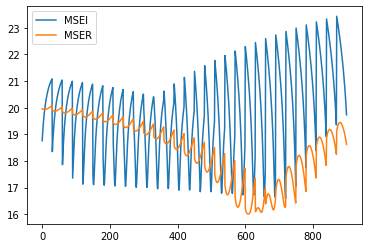

In [29]:
np.log(msedf[['MSEI', 'MSER']]).plot()

In [30]:
msedf.iloc[450:700].sort_values(['MSEI', 'MSER']).head(10)

,MSEI,MSER,beta,gamma
688,1.693484e+07,1.371008e+07,9.142967e-08,0.032934
656,1.718343e+07,1.625527e+07,9.036177e-08,0.031698
687,1.798697e+07,1.250240e+07,9.142967e-08,0.032316
625,1.816081e+07,2.259358e+07,8.929386e-08,0.031080
593,1.834695e+07,2.853832e+07,8.822596e-08,0.029844
624,1.910019e+07,2.030829e+07,8.929386e-08,0.030462
562,1.942542e+07,3.909642e+07,8.715805e-08,0.029226
530,1.952023e+07,4.857889e+07,8.609015e-08,0.027990
657,1.953954e+07,1.819707e+07,9.036177e-08,0.032316
561,2.019203e+07,3.616406e+07,8.715805e-08,0.028608


(460, 3)


Text(0.5, 1.0, 'Delhi - 5%')

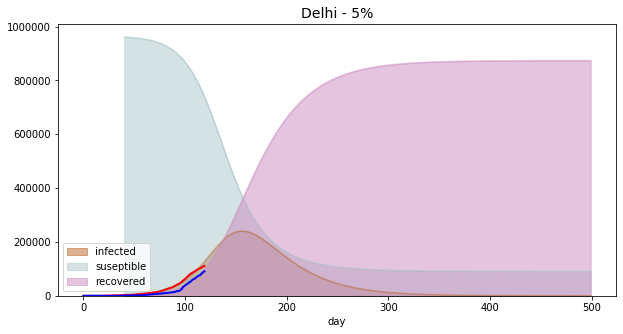

In [37]:
days = range(starting_day_for_0, 500)

ret = odeint(deriv,
             [Susceptible_City[starting_day_for_0], Infected_City[starting_day_for_0], Recovered_City[starting_day_for_0]],
             days,
             args=(total_pop, 9.409304e-08, 0.034848))
print(ret.shape)
S, I, R = ret.T
dfpresent = pd.DataFrame()
# Build a dataframe
dfpresent1 = pd.DataFrame()
#days = days + 40
dfpresent1 = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

f, (ax1) = plt.subplots(1,figsize=(10,5))
plt.rcParams["figure.figsize"] = [12,5]
dfpresent1.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',ax =ax1,
        stacked=False)

ax1.plot(pd.DataFrame(Infected_act_city),'r', alpha=1.0, lw=2, label='Infected')
ax1.plot(pd.DataFrame(Recovered_act_city),'b',alpha=1.0, lw=2, label='Recovered')
ax1.set_title('Delhi - 5%',fontsize = 14)

In [70]:
dfpresent1.sort_values('infected', ascending=False).head(1)

,suseptible,infected,recovered,day
120,371016.456265,240493.675668,353415.218067,155


In [71]:
dfpresent1.sort_values('recovered', ascending=False).head(1)

,suseptible,infected,recovered,day
464,91016.871584,67.270883,873841.207533,499


In [72]:
dfpresent1[dfpresent1['day']==100]

,suseptible,infected,recovered,day
65,864225.652782,60453.579736,40246.117482,100


In [73]:
dfpresent1[dfpresent1['day']==200]

,suseptible,infected,recovered,day
165,159418.421228,139246.082583,666260.846189,200


In [74]:
dfpresent1[dfpresent1['day']==300]

,suseptible,infected,recovered,day
265,95154.194992,12393.711796,857377.443213,300


In [75]:
import datetime
StartDate = datetime.datetime.strptime("20200314", "%Y%m%d")
StartDate + datetime.timedelta(days=np.int(dfpresent1.sort_values('infected', ascending=False).head(1)['day']))

datetime.datetime(2020, 8, 16, 0, 0)

In [76]:
data_test_all = pd.read_csv('Covid_Data_17.Jul.2020.csv')

In [77]:
data_test_tn = data_test_all.pivot_table(values='DL', index='Date', columns='Status', aggfunc='sum').reset_index()
data_test_tn['Date'] = pd.to_datetime(data_test_tn['Date'], errors='coerce')
data_test_tn = (data_test_tn.sort_values('Date').reset_index()).drop('index', axis=1)
data_test_tn['Removed'] = data_test_tn['Deceased'] + data_test_tn['Recovered']
data_test_tn.drop(['Deceased', 'Recovered'], axis=1, inplace=True)
data_test_tn['Infected_Active'] = 0
data_test_tn['Recovered_Active'] = 0
counter = 0
while counter < len(data_test_tn['Removed']):
    data_test_tn.loc[counter, 'Infected_Active'] = data_test_tn.loc[0:counter, 'Confirmed'].sum()*population_affected_in_city
    data_test_tn.loc[counter, 'Recovered_Active'] = data_test_tn.loc[0:counter, 'Removed'].sum()*population_affected_in_city
    counter = counter + 1
data_test_tn.drop(['Confirmed', 'Removed'], axis=1, inplace=True)

In [78]:
data_test_tn[len(Infected_City):len(data_test_tn)]

Status,Date,Infected_Active,Recovered_Active
120,2020-07-12,112494,93339
121,2020-07-13,113740,94723
122,2020-07-14,115346,96682
123,2020-07-15,116993,99186
124,2020-07-16,118645,101238
125,2020-07-17,120107,102872


In [79]:
dfpresent1[(dfpresent1['day']>=len(Infected_City)) & (dfpresent1['day']<len(data_test_tn))]

,suseptible,infected,recovered,day
85,722445.559694,135868.751573,106611.038733,120
86,713117.031826,140383.929282,111424.388893,121
87,703609.201179,144920.661111,116395.487710,122
88,693931.415996,149469.019422,121524.914582,123
89,684093.813287,154018.641366,126812.895347,124
90,674107.278444,158558.783705,132259.287851,125
